<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Ecuacion%20de%20onda.%20Metodo%20explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuacion de onda por el metodo explicito**
En fisica, esta ecuación modela cómo se propaga una vibración a través de un medio como una cuerda de guitarra. En matematicas, es una ecuación diferencial parcial iperbólica de segundo orden:$$\frac{\partial^2 u}{\partial t^2} = \alpha^2 \frac{\partial^2 u}{\partial x^2}$$


En este método sustituimos las derivada por Diferencias Finitas Centradas. Para la aceleración (tiempo):$$\frac{\partial^2 u}{\partial t^2} \approx \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{k^2}$$Para la curvatura (espacio):$$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}$$

Si sustituimos las aproximaciones en la ecuación original y despejamos $u_{i,j+1}$ (que es el valor en el futuro que queremos averiguar), obtenemos:$$u_{i, j+1} = 2(1 - \lambda^2)u_{i,j} + \lambda^2(u_{i+1,j} + u_{i-1,j}) - u_{i, j-1}$$Donde:$$\lambda = \frac{\alpha k}{h}$$

**Tenemos el siguiente problema para resolver:**

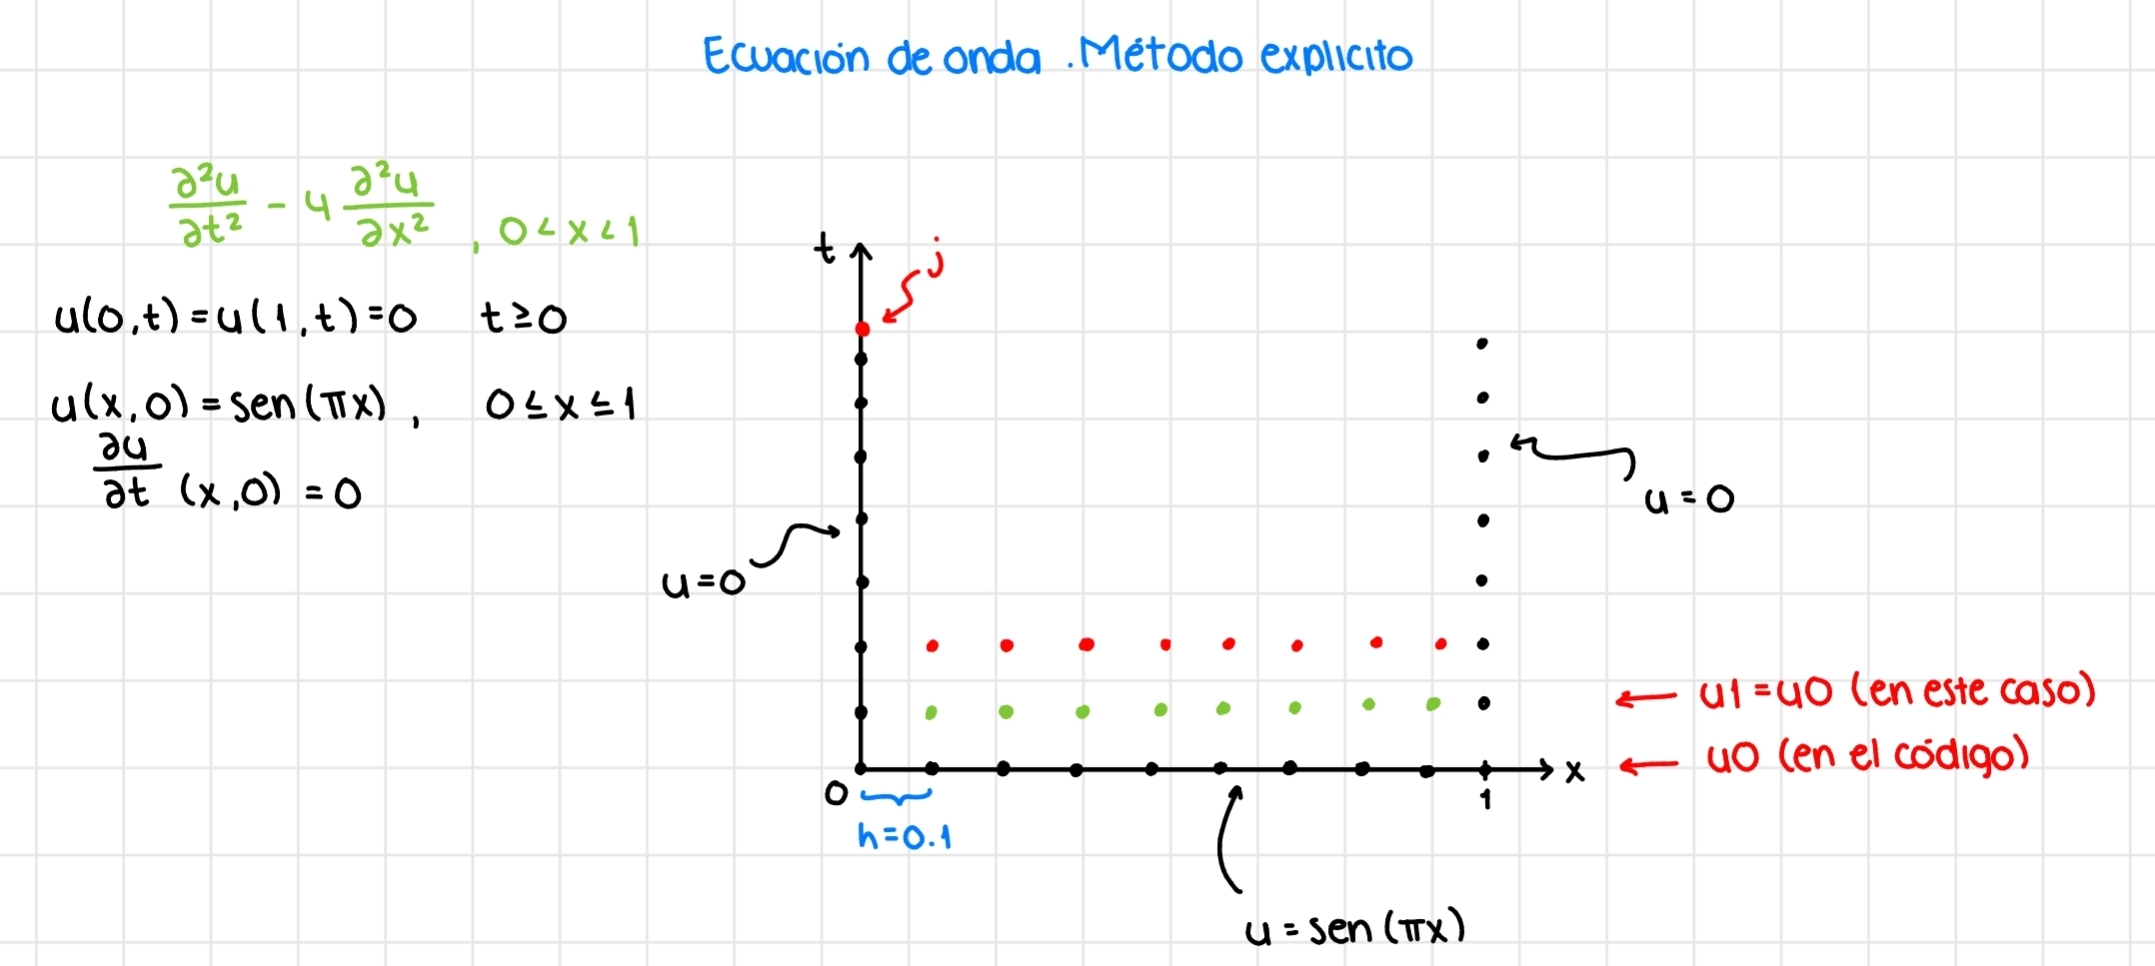

In [157]:
# Agregamos las librerias que vamos a ocupar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [158]:

# Tenemos los parámetros del problema
c = 2.0             # Es la velocidad de la onda
L = 1.0             # La longitud en x
T_max = 0.50        # El tiempo máximo solicitado
h = 0.1             # Paso en el espacio
k = 0.05            # Paso en el tiempo

# Calculamos a lambda
r = (c * k) / h # Podemos ver que es estable

# Definimos a la malla
x = np.arange(0, L + h/2, h)     # Puntos en x
t = np.arange(0, T_max + k/2, k) # Puntos en t

Nx = len(x)
Nt = len(t)

# Puntos interiores de la malla (excluyendo fronteras)
N_interior = Nx - 2

In [159]:
# Definimos la condición inicial
def f(x):
    return np.sin(np.pi * x)

# Definimos la funcion para calcular la solución exacta
def exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Creamos la matriz A para el método explícito
diag_val = 2 * (1 - r**2)
off_diag_val = r**2

A = np.zeros((N_interior, N_interior))
for i in range(N_interior):
    A[i, i] = diag_val
    if i > 0:
        A[i, i-1] = off_diag_val
    if i < N_interior - 1:
        A[i, i+1] = off_diag_val

# Creamos la matriz para guardar toda la solución
w = np.zeros((Nt, Nx))

# Aplicamos las condiciones iniciales
w[0, :] = f(x)
# Empezamos con los primeros tiempos
u_interior_0 = w[0, 1:-1]
u_interior_1 = 0.5 * np.dot(A, u_interior_0)
w[1, 1:-1] = u_interior_1

# Creamos el ciclo para los otros tiempos
for j in range(1, Nt - 1):
    u_curr = w[j, 1:-1]   # tiempo j
    u_prev = w[j-1, 1:-1] # tiempo j-1

    u_next = np.dot(A, u_curr) - u_prev
    w[j+1, 1:-1] = u_next


**Ejercicio 1:** Generamos las graficas 2D Y 3D

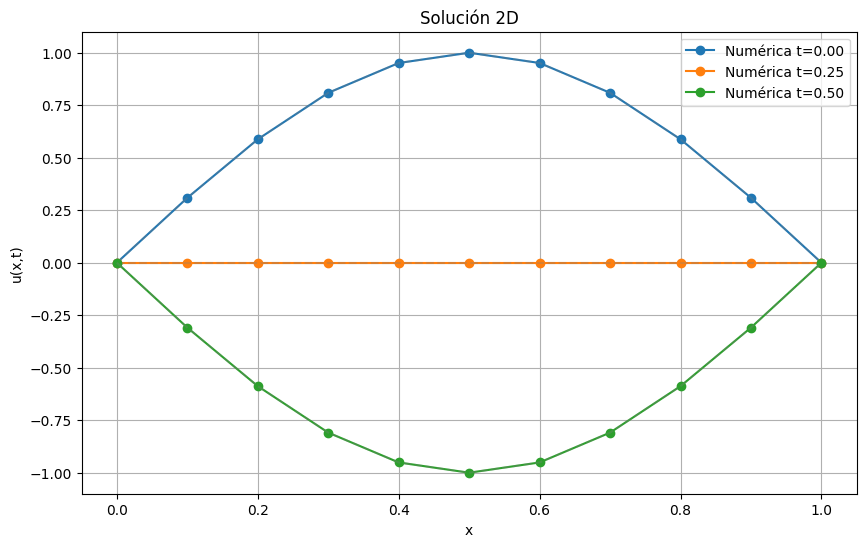

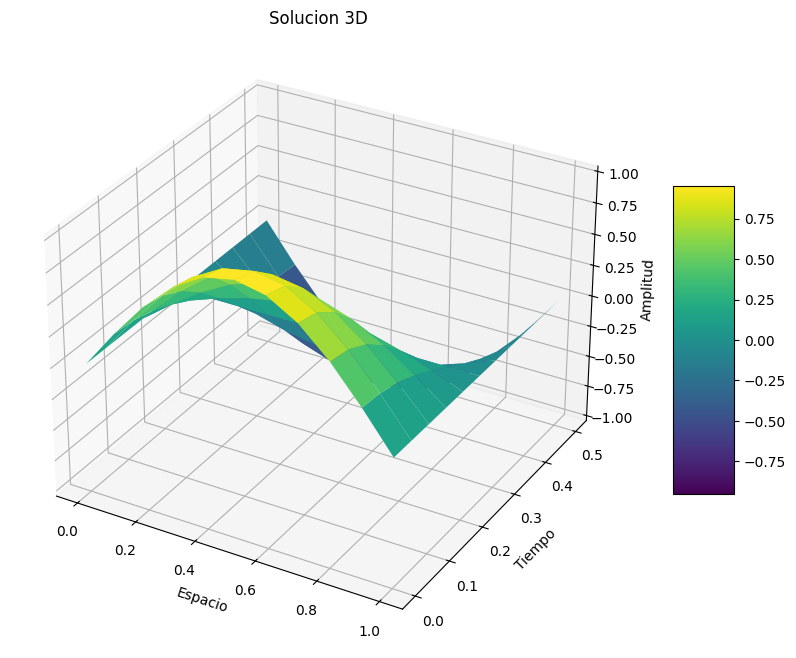

In [160]:
# Para la gráfica 2D
plt.figure(figsize=(10, 6))
# Graficamos inicio, mitad y final
tiempos_indices = [0, int(Nt/2), Nt-1]

for idx in tiempos_indices:
    tiempo_val = t[idx]
    plt.plot(x, w[idx, :], 'o-', label=f'Numérica t={tiempo_val:.2f}')
    plt.plot(x, exacta(x, tiempo_val), '--', color='gray', alpha=0.3)

plt.title('Solución 2D')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# Para la gráfica 3D
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, w, cmap=cm.viridis, edgecolor='none')

ax.set_title('Solucion 3D')
ax.set_xlabel('Espacio')
ax.set_ylabel('Tiempo')
ax.set_zlabel('Amplitud')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



**Ejercicio 2:** Comparamos los valores de la solucion numerica con los resultados de la tabla de la siguiente imagen

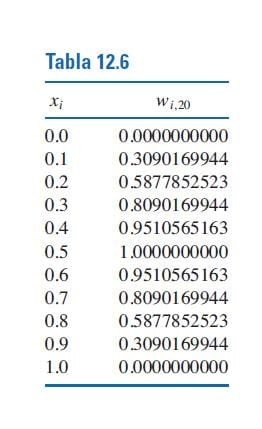

TABLA DE RESULTADOS PARA t = 0.50
x_i        | Solucion numerica    | Solucion exacta      | Error               
-----------+----------------------+----------------------+---------------------
0.0        | 0.0000000000         | -0.0000000000        | 0.0000000000e+00    
0.1        | -0.3090169944        | -0.3090169944        | 5.5511151231e-17    
0.2        | -0.5877852523        | -0.5877852523        | 3.3306690739e-16    
0.3        | -0.8090169944        | -0.8090169944        | 0.0000000000e+00    
0.4        | -0.9510565163        | -0.9510565163        | 1.1102230246e-16    
0.5        | -1.0000000000        | -1.0000000000        | 0.0000000000e+00    
0.6        | -0.9510565163        | -0.9510565163        | 0.0000000000e+00    
0.7        | -0.8090169944        | -0.8090169944        | 0.0000000000e+00    
0.8        | -0.5877852523        | -0.5877852523        | 3.3306690739e-16    
0.9        | -0.3090169944        | -0.3090169944        | 5.5511151231e-17    
1.0   

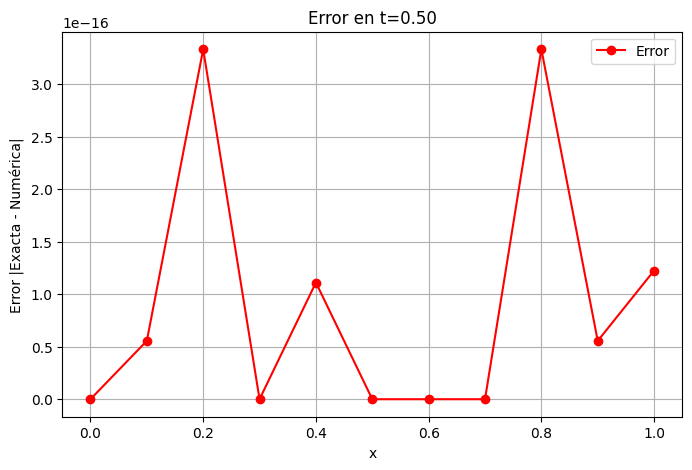

In [161]:
# Datos para t = 0.50
indice_final = Nt - 1
tiempo_final = t[indice_final]

sol_numerica = w[indice_final, :]
sol_exacta = exacta(x, tiempo_final)
error_abs = np.abs(sol_numerica - sol_exacta)


# Imprimimos la tabla con las soluciones

print(f"TABLA DE RESULTADOS PARA t = {tiempo_final:.2f}")
print(f"{'='*75}")
# Cabeceras con ancho fijo
print(f"{'x_i':<10} | {'Solucion numerica':<20} | {'Solucion exacta':<20} | {'Error':<20}")
print(f"{'-'*10}-+-{'-'*20}-+-{'-'*20}-+-{'-'*20}")

for i in range(Nx):
    print(f"{x[i]:<10.1f} | {sol_numerica[i]:<20.10f} | {sol_exacta[i]:<20.10f} | {error_abs[i]:<20.10e}")

# Calculamos el error
rms_error = np.sqrt(np.mean(error_abs**2))
print(f"Error: {rms_error:.5e}")

# Gráfica para el error
plt.figure(figsize=(8, 5))
plt.plot(x, error_abs, 'r-o', label='Error')
plt.title(f'Error en t={tiempo_final:.2f}')
plt.xlabel('x')
plt.ylabel('Error |Exacta - Numérica|')
plt.grid(True)
plt.legend()
plt.show()

Podemos ver que las soluciones son practicamente iguales, y el error es muy pequeño,practicamente es 0. Por eso tomamos muchos decimales para poder notarlo.

**Ejericio 2 (la siguiente parte):** Comparacion de las graficas de ambas soluciones

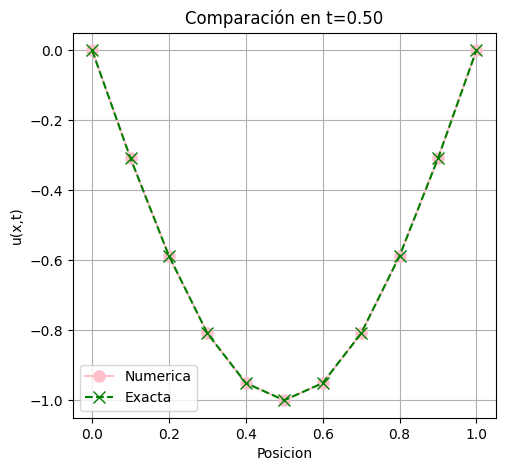

In [162]:
# Datos en t = 0.50
indice_final = Nt - 1
t_final = t[indice_final]

u_num = w[indice_final, :]
u_exac = exacta(x, t_final)
error = np.abs(u_num - u_exac)

# Graficas de las dos soluciones
plt.figure(figsize=(12, 5))

# Comparacion de las graficas porque las ponemos juntas para ver que pasa
plt.subplot(1, 2, 1)
plt.plot(x, u_num, 'o-', label='Numerica', color='pink', markersize=8)
plt.plot(x, u_exac, 'x--', label='Exacta', color='green', markersize=8)
plt.title(f'Comparación en t={t_final:.2f}')
plt.xlabel('Posicion')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)


En esta comparacion con ambas soluciones nos podemos dar cuenta que son teoricamente identicas y aun viendo la grafica del error podemos notar que es demasiado pequeño e incluso para notarlo tenemos que tomar muchos valores decimales, pues las graficas son identicas.

**Ejercicio 4:** Generar una animacion donde se observen las ondulaciones

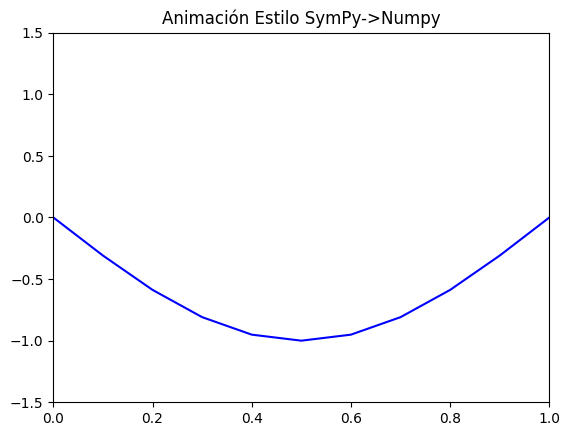

In [163]:
# Creamos la animacion
fig_anim, ax_anim = plt.subplots()
ax_anim.set_xlim(0, 1)
ax_anim.set_ylim(-1.5, 1.5)
ax_anim.set_title("Animación Estilo SymPy->Numpy")
linea, = ax_anim.plot([], [], 'b-')

def init():
    linea.set_data([], [])
    return (linea,)

def animate(i):
    linea.set_data(x, U_np[i, :])
    return (linea,)

anim = FuncAnimation(fig_anim, animate, init_func=init, frames=len(t), interval=100, blit=True)
HTML(anim.to_jshtml())

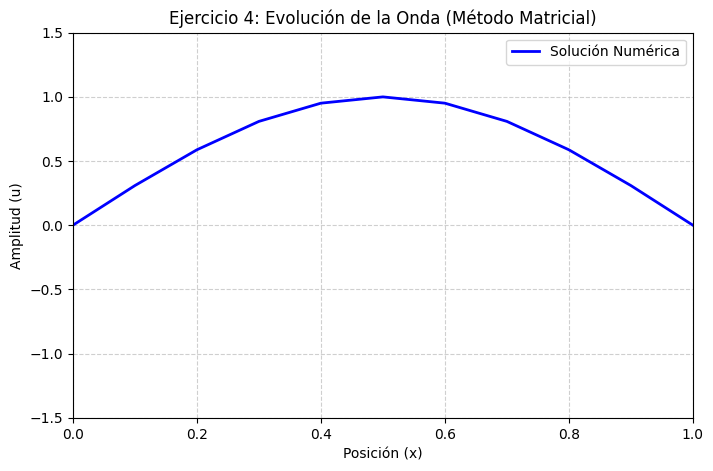

In [164]:
# ==============================================================================
#  EJERCICIO 4: ANIMACIÓN (Adaptada)
# ==============================================================================

# 1. Configurar la figura
fig_anim, ax_anim = plt.subplots(figsize=(8, 5))
ax_anim.set_xlim(0, 1)
ax_anim.set_ylim(-1.5, 1.5)
ax_anim.set_title("Ejercicio 4: Evolución de la Onda (Método Matricial)")
ax_anim.set_xlabel("Posición (x)")
ax_anim.set_ylabel("Amplitud (u)")
ax_anim.grid(True, linestyle='--', alpha=0.6)

# 2. Crear la línea vacía que se moverá
linea, = ax_anim.plot([], [], 'b-', lw=2, label='Solución Numérica')
ax_anim.legend()

# 3. Función de inicialización (fondo limpio)
def init():
    linea.set_data([], [])
    return (linea,)

# 4. Función de actualización (cuadro por cuadro)
def animate(i):
    # 'i' es el índice del tiempo (fila de la matriz U_np)
    # Usamos la variable global 'x' y la fila 'i' de U_np
    linea.set_data(x, U_np[i, :])
    return (linea,)

# 5. Generar la animación
# frames = U_np.shape[0] asegura que usemos todos los pasos de tiempo calculados
anim = FuncAnimation(fig_anim, animate, init_func=init,
                     frames=U_np.shape[0], interval=150, blit=True)

# 6. Mostrar el video
HTML(anim.to_jshtml())